In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import numpy as np
import math

# Data Dictionary

## Source

The data was automatically gathered from death certificates submitted in New York City. The data was released by the New York Department of Health and Mental Hygiene through the New York Open Data platform.

## Columns

### Year

The year in which the deaths took place. Datatype is int64. All datapoints have an associated year. (2007-2014, 2019)

### Leading Cause

The leading cause of death indicated on the death certificate. Also includes the mortality code corresponding to the cause of death. Datatype is string. List of causes of death at the end of the data dictionary.

### Sex

The sex indicated on the death certificate. Datatype is string. The two options are 'M', indicateing male and 'F', indicateing female. In the original data there is also 'Male' for male and 'Female' for female, but those values will be converted to 'M' and 'F' for consistency.

### Race/Ethnicity

The race/ethnicity recorded on the death certificate. Datatype is string. There are eight options in the original data. However, those will be consolidated to six options because Non-Hispanic White and Non-Hispanic Black are the same as White Non-Hispanic and Black Non-Hispanic. The differnces that occur in the race/ethnicity column and the sex column appear to be the result of a difference in the way data is entered in 2019. The final options are Other Race/ Ethnicity, Hispanic, Not Stated/Unknown, Non-Hispanic White, Asian and Pacific Islander, and Non-Hispanic Black.

### Deaths

The number of death certificates issued for the given leading cause of death within the given sex and racial/ethnic category in the given year. Datatype is int64. (1 - 7050)

### Death Rate

The death rate for the given in the given year. The method used to calculate death rate is to divide number of deaths by population within the category, then mutiply by 100000. It was originally unclear as to whether the the population used in this calculation was the population of the given ethnic group and This gives the number of deaths per 100000 people. This equation was not supplied with the data but can be found in [this pdf](https://www1.nyc.gov/assets/doh/downloads/pdf/vs/2019sum.pdf) released by the New York Department of Health and Mental Hygiene covering the same data as we are handling. Datatype is float64. (2.4 - 491.4)

### Age Adjusted Death Rate

The age adjusted death rate for the given leading cause in the given year. Age adjusted death rate is calculated by adjusting the death rates by the population distribution across age groups. According to the pdf given in the above, the age groups used were 0-24, 25-44, 45-64, 65-84, 85+ with the standard us population distribution. This was done to allow comparisons to be made to different geographical locations. I do not have the original age group table used. Datatype is float64. (2.5 - 414.594473)

## Causes of Death

<details>
<summary>Causes of Death</summary>
<br>
Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)  
    
Influenza (Flu) and Pneumonia (J09-J18)  
    
Assault (Homicide: Y87.1, X85-Y09)  
    
Essential Hypertension and Renal Diseases (I10, I12)  
    
Cerebrovascular Disease (Stroke: I60-I69)  
    
All Other Causes  
    
Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)  
    
Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)  
    
Intentional Self-Harm (Suicide: X60-X84, Y87.0)  
    
Chronic Lower Respiratory Diseases (J40-J47)  
    
Diabetes Mellitus (E10-E14)  
    
Diseases of Heart (I00-I09, I11, I13, I20-I51)  
    
Alzheimer's Disease (G30)  
    
Certain Conditions originating in the Perinatal Period (P00-P96)  
    
Malignant Neoplasms (Cancer: C00-C97)  
    
Viral Hepatitis (B15-B19)  
    
Human Immunodeficiency Virus Disease (HIV: B20-B24)  
    
Septicemia (A40-A41)  
    
Chronic Liver Disease and Cirrhosis (K70, K73)  
    
Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)  
    
Atherosclerosis (I70)  
    
Mental and Behavioral Disorders due to Use of Alcohol (F10)  
    
Tuberculosis (A16-A19)  
    
Aortic Aneurysm and Dissection (I71)  
    
Insitu or Benign / Uncertain Neoplasms (D00-D48)  
    
Parkinson's Disease (G20)  
    
Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)  
    
Chronic Liver Disease and Cirrhosis (K70, K73-K74)  
    
Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)  
    
Assault (Homicide: U01-U02, Y87.1, X85-Y09)  
    
Complications of Medical and Surgical Care (Y40-Y84, Y88)  
    
Cholelithiasis and Disorders of Gallbladder (K80-K82)  
    
Anemias (D50-D64)  
    
Peptic Ulcer (K25-K28)  
</details>

In [2]:
df = pd.read_csv("./New_York_City_Leading_Causes_of_Death.csv")

In [3]:
df.shape

(1272, 7)

Our data has 7 columns and 1272 rows.

In [4]:
df.columns = [x.lower().replace(" ", "_") for x in df.columns]

In [5]:
df.columns

Index(['year', 'leading_cause', 'sex', 'race_ethnicity', 'deaths',
       'death_rate', 'age_adjusted_death_rate'],
      dtype='object')

The columns are converted to lowercase and spaces are replaced with underscores for readability and ease of use.

In [6]:
df['sex'].unique()

array(['F', 'M', 'Male', 'Female'], dtype=object)

In [7]:
df['sex'] = ['F' if (x == 'F' or x == 'Female') else 'M' for x in df['sex']]

In [8]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [9]:
df['deaths'] = [np.nan  if x == '.' else x for x in df['deaths']]

In [10]:
df['deaths'].value_counts(dropna=False)

NaN     138
5        35
8        24
6        22
1        21
       ... 
621       1
563       1
409       1
4507      1
1578      1
Name: deaths, Length: 505, dtype: int64

In [11]:
df['death_rate'] = [np.nan  if x == '.' else x for x in df['death_rate']]

In [12]:
df['death_rate'].value_counts(dropna=False)

NaN           453
17.3            7
13              7
11.4            6
18              6
             ... 
10.3            1
17.1            1
14.3            1
88.5            1
70.7534133      1
Name: death_rate, Length: 546, dtype: int64

In [13]:
df['age_adjusted_death_rate'] = [np.nan  if x == '.' else x for x in df['age_adjusted_death_rate']]

In [14]:
df['age_adjusted_death_rate'].value_counts(dropna=False)

NaN           453
17.9            6
6.3             6
21.4            6
16.8            5
             ... 
243.6           1
26.9            1
78.6            1
124.5           1
88.7919256      1
Name: age_adjusted_death_rate, Length: 538, dtype: int64

Converted all '.' placeholder characters to np.NaN for consistency.

In [15]:
df['race_ethnicity'].unique()

array(['Other Race/ Ethnicity', 'Hispanic', 'Not Stated/Unknown',
       'White Non-Hispanic', 'Asian and Pacific Islander',
       'Black Non-Hispanic', 'Non-Hispanic White', 'Non-Hispanic Black'],
      dtype=object)

In [16]:
relist = df['race_ethnicity'].copy()

for i in range(len(relist)):
    item = relist[i]
    if item == 'White Non-Hispanic':
        relist[i] = 'Non-Hispanic White'
    elif item == 'Black Non-Hispanic':
        relist[i] = 'Non-Hispanic Black'
        
df['race_ethnicity'] = relist

In [17]:
df['race_ethnicity'].unique()

array(['Other Race/ Ethnicity', 'Hispanic', 'Not Stated/Unknown',
       'Non-Hispanic White', 'Asian and Pacific Islander',
       'Non-Hispanic Black'], dtype=object)

Female and Male changed to F and M in sex column for ease in processing.

In [18]:
duplicates = df[df.duplicated()]

In [19]:
df.drop_duplicates()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2009,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Other Race/ Ethnicity,NaN,NaN,NaN
1,2013,Influenza (Flu) and Pneumonia (J09-J18),F,Hispanic,204,16.3,18.5
2,2012,"Assault (Homicide: Y87.1, X85-Y09)",M,Other Race/ Ethnicity,NaN,NaN,NaN
3,2007,Essential Hypertension and Renal Diseases (I10...,F,Not Stated/Unknown,5,NaN,NaN
4,2014,Cerebrovascular Disease (Stroke: I60-I69),F,Non-Hispanic White,418,29.5,15.6
...,...,...,...,...,...,...,...
1267,2019,Influenza (Flu) and Pneumonia (J09-J18),F,Not Stated/Unknown,8,8.844176662,12.14778648
1268,2019,Certain Conditions originating in the Perinata...,F,Not Stated/Unknown,7,7.73865458,6.390793995
1269,2019,Mental and Behavioral Disorders due to Acciden...,F,Not Stated/Unknown,5,5.527610414,6.724040882
1270,2019,"Intentional Self-Harm (Suicide: U03, X60-X84, ...",F,Not Stated/Unknown,5,5.527610414,6.979219825


Two duplicate rows are dropped from the dataframe. The data was compiled by an automated system, so duplicates may have resulted from errors in the system or the input data.

In [20]:
df['year'].nunique()

9

Data was collected over a nine year period.

In [21]:
df.dtypes

year                        int64
leading_cause              object
sex                        object
race_ethnicity             object
deaths                     object
death_rate                 object
age_adjusted_death_rate    object
dtype: object

The columns deaths, death_rate, and age_adjusted_death_rate should all be numerical datatypes, but there is a non-numerical datapoint representing rows where there is no data.

In [22]:
df['leading_cause'].unique()

array(['Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)',
       'Influenza (Flu) and Pneumonia (J09-J18)',
       'Assault (Homicide: Y87.1, X85-Y09)',
       'Essential Hypertension and Renal Diseases (I10, I12)',
       'Cerebrovascular Disease (Stroke: I60-I69)', 'All Other Causes',
       'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)',
       'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)',
       'Intentional Self-Harm (Suicide: X60-X84, Y87.0)',
       'Chronic Lower Respiratory Diseases (J40-J47)',
       'Diabetes Mellitus (E10-E14)',
       'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       "Alzheimer's Disease (G30)",
       'Certain Conditions originating in the Perinatal Period (P00-P96)',
       'Malignant Neoplasms (Cancer: C00-C97)',
       'Viral Hepatitis (B15-B19)',
       'Human Immunodeficiency Virus Disease (HIV: B20-B24)',
       '

In [23]:
df['leading_cause'] = [re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in df['leading_cause']]
# Used regex from https://stackoverflow.com/questions/14596884/remove-text-between-and to remove characters between parenthesis.

In [24]:
df['leading_cause'].unique()

array(['Nephritis, Nephrotic Syndrome and Nephrisis',
       'Influenza  and Pneumonia', 'Assault',
       'Essential Hypertension and Renal Diseases',
       'Cerebrovascular Disease', 'All Other Causes',
       'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use',
       'Accidents Except Drug Posioning', 'Intentional Self-Harm',
       'Chronic Lower Respiratory Diseases', 'Diabetes Mellitus',
       'Diseases of Heart', "Alzheimer's Disease",
       'Certain Conditions originating in the Perinatal Period',
       'Malignant Neoplasms', 'Viral Hepatitis',
       'Human Immunodeficiency Virus Disease', 'Septicemia',
       'Chronic Liver Disease and Cirrhosis',
       'Congenital Malformations, Deformations, and Chromosomal Abnormalities',
       'Atherosclerosis',
       'Mental and Behavioral Disorders due to Use of Alcohol',
       'Tuberculosis', 'Aortic Aneurysm and Dissection',
       'Insitu or Benign / Uncertain Neoplasms', "Parki

Removed extra codes that were in parenthesis after the causes of death because the were not useful to us and decreased readibility.

In [25]:
df['deaths'].value_counts(dropna=False)

NaN     138
5        35
8        24
6        22
1        21
       ... 
621       1
563       1
409       1
4507      1
1578      1
Name: deaths, Length: 505, dtype: int64

In [26]:
df['death_rate'].value_counts(dropna=False)

NaN           453
17.3            7
13              7
11.4            6
18              6
             ... 
10.3            1
17.1            1
14.3            1
88.5            1
70.7534133      1
Name: death_rate, Length: 546, dtype: int64

In [27]:
df['age_adjusted_death_rate'].value_counts(dropna=False)

NaN           453
17.9            6
6.3             6
21.4            6
16.8            5
             ... 
243.6           1
26.9            1
78.6            1
124.5           1
88.7919256      1
Name: age_adjusted_death_rate, Length: 538, dtype: int64

In [28]:
df['race_ethnicity'].value_counts()

Other Race/ Ethnicity         253
Not Stated/Unknown            223
Non-Hispanic Black            200
Hispanic                      199
Asian and Pacific Islander    199
Non-Hispanic White            198
Name: race_ethnicity, dtype: int64

In [29]:
missingdf = df[df['age_adjusted_death_rate'].isna()].copy()

In [30]:
missingdf

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2009,"Nephritis, Nephrotic Syndrome and Nephrisis",F,Other Race/ Ethnicity,NaN,NaN,NaN
2,2012,Assault,M,Other Race/ Ethnicity,NaN,NaN,NaN
3,2007,Essential Hypertension and Renal Diseases,F,Not Stated/Unknown,5,NaN,NaN
8,2013,All Other Causes,M,Not Stated/Unknown,139,NaN,NaN
11,2011,Mental and Behavioral Disorders due to Acciden...,M,Not Stated/Unknown,5,NaN,NaN
...,...,...,...,...,...,...,...
1255,2019,Anemias,F,Other Race/ Ethnicity,1,NaN,NaN
1256,2019,Cholelithiasis and Disorders of Gallbladder,F,Other Race/ Ethnicity,1,NaN,NaN
1257,2019,Parkinson's Disease,F,Other Race/ Ethnicity,1,NaN,NaN
1258,2019,Peptic Ulcer,F,Other Race/ Ethnicity,1,NaN,NaN


In [31]:
numdf = pd.merge(df,missingdf, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
# dropping data shared with another dataset from https://stackoverflow.com/questions/44706485/how-to-remove-rows-in-a-pandas-dataframe-if-the-same-row-exists-in-another-dataf
# I feel like there should be an easier way to achieve what I want but I couldn't figure it out.

In [32]:
numdf

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
1,2013,Influenza and Pneumonia,F,Hispanic,204,16.3,18.5
4,2014,Cerebrovascular Disease,F,Non-Hispanic White,418,29.5,15.6
5,2009,Essential Hypertension and Renal Diseases,M,Asian and Pacific Islander,26,5.1,7.2
6,2013,Influenza and Pneumonia,M,Non-Hispanic White,618,45.9,36.7
7,2007,Assault,M,Non-Hispanic Black,267,31.3,31.1
...,...,...,...,...,...,...,...
1271,2019,Influenza and Pneumonia,F,Not Stated/Unknown,8,8.844176662,12.14778648
1272,2019,Certain Conditions originating in the Perinata...,F,Not Stated/Unknown,7,7.73865458,6.390793995
1273,2019,Mental and Behavioral Disorders due to Acciden...,F,Not Stated/Unknown,5,5.527610414,6.724040882
1274,2019,Intentional Self-Harm,F,Not Stated/Unknown,5,5.527610414,6.979219825


The missing data is moved into another dataset so that the main data can be analyzed numerically and so that we have a more clear picture as to what kind of data is missing.

In [33]:
missingdf['deaths'].value_counts(dropna=False)

NaN    138
5       33
8       23
6       22
1       21
      ... 
95       1
92       1
106      1
26       1
30       1
Name: deaths, Length: 77, dtype: int64

In [34]:
missingdf['death_rate'].value_counts(dropna=False)

NaN    453
Name: death_rate, dtype: int64

In [35]:
missingdf['age_adjusted_death_rate'].value_counts(dropna=False)

NaN    453
Name: age_adjusted_death_rate, dtype: int64

In [36]:
missingdf['race_ethnicity'].value_counts()

Other Race/ Ethnicity    253
Not Stated/Unknown       200
Name: race_ethnicity, dtype: int64

The missing data on number of deaths all appears to coincide with either unknown or races/ethnicities that are not among the main races/ethnicities represented in the data. It also appears to account for the majority of missing, unknown, and unaccounted for ethnicities represented in the data.

In [37]:
missingdf['year'].value_counts()

2019    67
2011    53
2007    51
2010    50
2014    48
2008    47
2009    46
2012    46
2013    45
Name: year, dtype: int64

The missing data appears to be relatively evenly distributed accross the year.

In [38]:
missingdf['sex'].value_counts()

F    234
M    219
Name: sex, dtype: int64

There are more female missing entrys missing data then male, but because the data that is missing is number of deaths, in is difficult to tell whether more men or more women were not entered.

<AxesSubplot:>

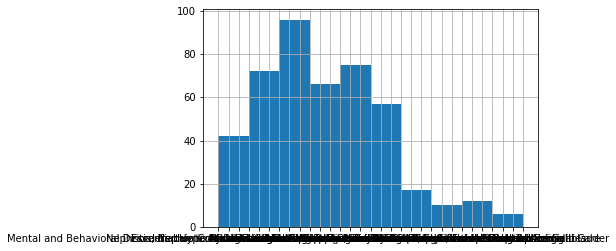

In [39]:
missingdf['leading_cause'].hist()

<AxesSubplot:>

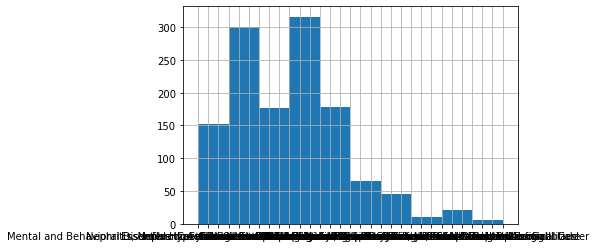

In [40]:
df['leading_cause'].hist()

<AxesSubplot:>

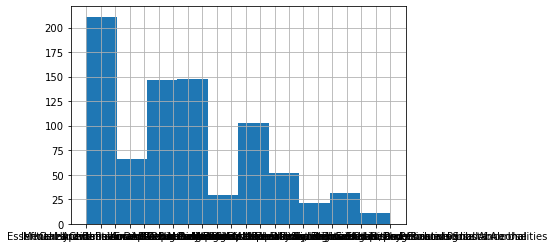

In [41]:
numdf['leading_cause'].hist()

The pandas hist function does not handle the text based values well enough to give a clear picture of the data. The x axis is unreadable.

In [42]:
numdf['leading_cause'].nunique()

22

In [43]:
df['leading_cause'].nunique()

31

In [44]:
missing_causes = np.setdiff1d(missingdf['leading_cause'].unique(), numdf['leading_cause'].unique(), assume_unique=True)

In [45]:
missing_causes

array(['Atherosclerosis', 'Tuberculosis',
       'Aortic Aneurysm and Dissection',
       'Insitu or Benign / Uncertain Neoplasms', "Parkinson's Disease",
       'Complications of Medical and Surgical Care',
       'Cholelithiasis and Disorders of Gallbladder', 'Anemias',
       'Peptic Ulcer'], dtype=object)

None of the leading causes in the missing causes have any data regarding the number of deaths or death rate in this dataset and have therefore been exluded from numdf, our dataframe excluding missing data.

In [46]:
numdf['deaths'] = numdf['deaths'].astype(np.int64)

In [47]:
numdf['death_rate'] = numdf['death_rate'].astype(float)

In [48]:
numdf['age_adjusted_death_rate'] = numdf['age_adjusted_death_rate'].astype(float)

In [49]:
numdf.dtypes

year                         int64
leading_cause               object
sex                         object
race_ethnicity              object
deaths                       int64
death_rate                 float64
age_adjusted_death_rate    float64
dtype: object

Cleaned data is converted to numerical datatypes.

In [50]:
numdf.describe()

,year,deaths,death_rate,age_adjusted_death_rate
count,819.000000,819.000000,819.000000,819.000000
mean,2011.638584,577.313797,53.524092,53.211337
std,3.614529,958.372480,75.619619,69.038603
min,2007.000000,5.000000,2.400000,2.500000
25%,2009.000000,102.000000,11.950000,12.000000
50%,2011.000000,207.000000,18.500000,20.000000
75%,2013.000000,472.500000,66.068424,77.900000
max,2019.000000,7050.000000,491.400000,414.594473


In [51]:
linedf = numdf[['year','deaths']].copy()

In [52]:
linedf = linedf.groupby(['year'], as_index=False).agg({'deaths':'sum'})

In [53]:
linedf

,year,deaths
0,2007,53396
1,2008,53437
2,2009,52198
3,2010,51924
4,2011,52191
5,2012,51634
6,2013,52125
7,2014,51855
8,2019,54060


# Deaths occurring each year

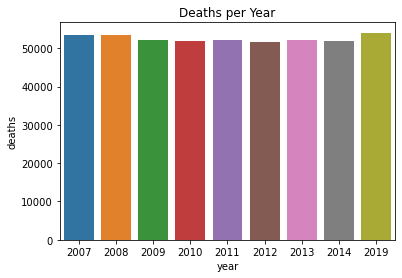

In [54]:
line = sns.barplot(data=linedf, x='year', y='deaths').set(
    title = "Deaths per Year"
)

The number of deaths each year appears to be relatively consitent year by year. There is a notable gap in the data between 2014 and 2019.

In [55]:
linedf = numdf[['year','sex','deaths']].copy()

In [56]:
linedf = linedf.groupby(['year','sex'], as_index=False).agg({'deaths':'sum'})

In [57]:
linedf

,year,sex,deaths
0,2007,F,27493
1,2007,M,25903
2,2008,F,27505
3,2008,M,25932
4,2009,F,26659
5,2009,M,25539
6,2010,F,26414
7,2010,M,25510
8,2011,F,26853
9,2011,M,25338


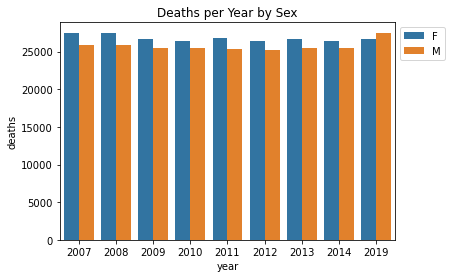

In [58]:
line = sns.barplot(data=linedf, x='year', y='deaths', hue= 'sex').set(
    title = "Deaths per Year by Sex"
)
plt.legend(bbox_to_anchor = (1,1))

It appears that women had a slightly higher death rate up until 2019, where men had a slightly higher death rate.

In [59]:
linedf = numdf[['year','race_ethnicity','deaths']].copy()

In [60]:
linedf = linedf.groupby(['year','race_ethnicity'], as_index=False).agg({'deaths':'sum'})

In [61]:
linedf

,year,race_ethnicity,deaths
0,2007,Asian and Pacific Islander,2874
1,2007,Hispanic,8785
2,2007,Non-Hispanic Black,14258
3,2007,Non-Hispanic White,27479
4,2008,Asian and Pacific Islander,2971
5,2008,Hispanic,9329
6,2008,Non-Hispanic Black,14006
7,2008,Non-Hispanic White,27131
8,2009,Asian and Pacific Islander,3035
9,2009,Hispanic,9178


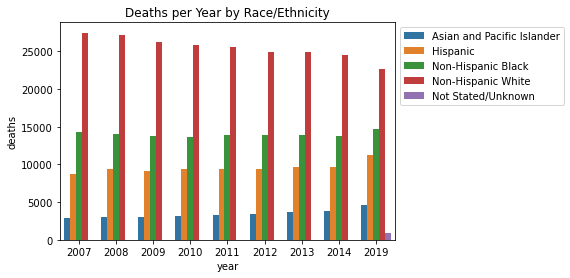

In [62]:
line = sns.barplot(data=linedf, x='year', y='deaths', hue= 'race_ethnicity').set(
    title = "Deaths per Year by Race/Ethnicity"
)
plt.legend(bbox_to_anchor = (1,1))

There seems to be a relatively consitent distribution of deaths accross the different ethnicities. Notably, 2019 includes deaths for unknown and not stated ethnicities, which do not appear in the other years.

# Death Rate and Age Adjusted Death Rate

Because we know the equation used to calculate to death rate from the number of deaths and population, we can reverse engineer an approximation of the population. Without the original population data, it is impossible to verify the accuarcy of the reverse engineered data, so it can only be used to give us a rough impression of deathrates accross the various categories.

In [63]:
def calculate_pop(dataframe):
    for i in range(dataframe.shape[0]):
        data = dataframe.iloc[i]
        yield np.int64((data['deaths'] * 100000) / data['death_rate'])

In [64]:
numdf.insert(7, "population", [*calculate_pop(numdf)])

In [65]:
numdf

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate,population
1,2013,Influenza and Pneumonia,F,Hispanic,204,16.300000,18.500000,1251533
4,2014,Cerebrovascular Disease,F,Non-Hispanic White,418,29.500000,15.600000,1416949
5,2009,Essential Hypertension and Renal Diseases,M,Asian and Pacific Islander,26,5.100000,7.200000,509803
6,2013,Influenza and Pneumonia,M,Non-Hispanic White,618,45.900000,36.700000,1346405
7,2007,Assault,M,Non-Hispanic Black,267,31.300000,31.100000,853035
...,...,...,...,...,...,...,...,...
1271,2019,Influenza and Pneumonia,F,Not Stated/Unknown,8,8.844177,12.147786,90455
1272,2019,Certain Conditions originating in the Perinata...,F,Not Stated/Unknown,7,7.738655,6.390794,90454
1273,2019,Mental and Behavioral Disorders due to Acciden...,F,Not Stated/Unknown,5,5.527610,6.724041,90455
1274,2019,Intentional Self-Harm,F,Not Stated/Unknown,5,5.527610,6.979220,90455


Here we have added another column to our dataframe containing the calculated population of the given category. Due to rounding errors there is a variation of plus or minus one for the population within a calculation. With this new information we will be able to have estimates of the death rates across larger populations.

In [66]:
def calc_death_rate(dataframe):
    for i in range(dataframe.shape[0]):
        data = dataframe.iloc[i]
        yield (data['deaths'] / data['population']) * 100000

In [67]:
linedf = numdf[['year','sex','race_ethnicity','deaths','population']].copy()

In [68]:
linedf = linedf.groupby(['year','sex','race_ethnicity'], as_index=False).agg({'deaths':'sum','population':'mean'})

In [69]:
linedf['population'] = [math.floor(x) for x in linedf['population']]

In [70]:
linedf = linedf[['year','deaths','population']].copy()

In [71]:
linedf = linedf.groupby(['year'], as_index=False).agg({'deaths':'sum','population':'sum'})

In [72]:
linedf.insert(2, "death_rate", [*calc_death_rate(linedf)])

In [73]:
linedf

,year,deaths,death_rate,population
0,2007,53396,673.195301,7931725
1,2008,53437,668.520297,7993325
2,2009,52198,647.833355,8057319
3,2010,51924,639.986353,8113298
4,2011,52191,642.155633,8127469
5,2012,51634,630.584509,8188276
6,2013,52125,631.368341,8255878
7,2014,51855,622.279067,8333078
8,2019,54060,648.449700,8336807


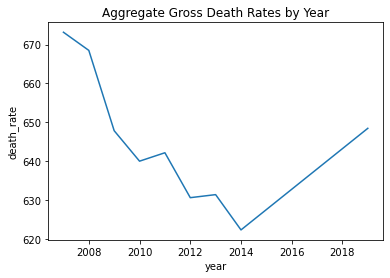

In [74]:
plot = sns.lineplot(x=linedf['year'], y=linedf['death_rate']).set(
    title = 'Aggregate Gross Death Rates by Year'
)

After calculating the aggregate death rate and population for each year, we can see that the calculated population data is consitent with actual New York City population data. From the line graph that we have drawn, it appears that the death rate was trending downwards until 2014, then increased in 2019. This could have also resulted in changed data entry methods and standards in 2019. Note that these death rates are not age adjusted, so they may not match figures from other sources that use the more accurate age adjusted death rates.

In [75]:
linedf = numdf[['year','sex','race_ethnicity','deaths','population']].copy()

In [76]:
linedf = linedf.groupby(['year','sex','race_ethnicity'], as_index=False).agg({'deaths':'sum','population':'mean'})

In [77]:
linedf['population'] = [math.floor(x) for x in linedf['population']]

In [78]:
linedf = linedf[['year','sex','deaths','population']].copy()

In [79]:
linedf = linedf.groupby(['year', 'sex'], as_index=False).agg({'deaths':'sum','population':'sum'})

In [80]:
linedf.insert(2, "death_rate", [*calc_death_rate(linedf)])

In [81]:
linedf

,year,sex,death_rate,deaths,population
0,2007,F,659.613800,27493,4168045
1,2007,M,688.235982,25903,3763680
2,2008,F,655.274585,27505,4197477
3,2008,M,683.167503,25932,3795848
4,2009,F,630.315531,26659,4229469
5,2009,M,667.189153,25539,3827850
6,2010,F,620.210300,26414,4258878
7,2010,M,661.837579,25510,3854420
8,2011,F,630.450824,26853,4259333
9,2011,M,655.044187,25338,3868136


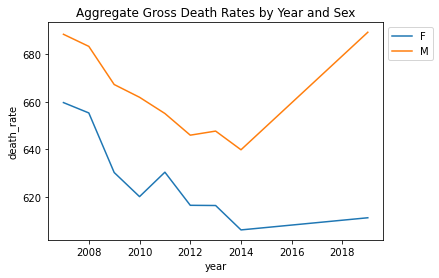

In [82]:
plot = sns.lineplot(x=linedf['year'], y=linedf['death_rate'], hue = linedf['sex']).set(
    title = 'Aggregate Gross Death Rates by Year and Sex'
)
plt.legend(bbox_to_anchor = (1,1))

It appears that the male death rate is consitently higher than the female death rate. In particularly, it increased much more that the female death rate between 2014 and 2019.

In [83]:
linedf = numdf[['year','sex','race_ethnicity','deaths','population']].copy()

In [84]:
linedf = linedf.groupby(['year','sex','race_ethnicity'], as_index=False).agg({'deaths':'sum','population':'mean'})

In [85]:
linedf['population'] = [math.floor(x) for x in linedf['population']]

In [86]:
linedf = linedf[['year','race_ethnicity','deaths','population']].copy()

In [87]:
linedf = linedf.groupby(['year', 'race_ethnicity'], as_index=False).agg({'deaths':'sum','population':'sum'})

In [88]:
linedf.insert(2, "death_rate", [*calc_death_rate(linedf)])

In [89]:
linedf

,year,race_ethnicity,death_rate,deaths,population
0,2007,Asian and Pacific Islander,287.695175,2874,998974
1,2007,Hispanic,389.113676,8785,2257695
2,2007,Non-Hispanic Black,749.093580,14258,1903367
3,2007,Non-Hispanic White,991.417147,27479,2771689
4,2008,Asian and Pacific Islander,287.686328,2971,1032722
5,2008,Hispanic,408.027054,9329,2286368
6,2008,Non-Hispanic Black,738.694769,14006,1896047
7,2008,Non-Hispanic White,976.571780,27131,2778188
8,2009,Asian and Pacific Islander,286.346688,3035,1059904
9,2009,Hispanic,395.731208,9178,2319251


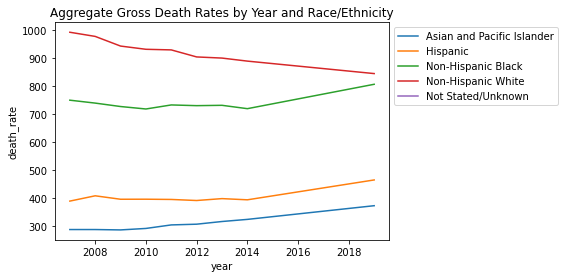

In [92]:
plot = sns.lineplot(x=linedf['year'], y=linedf['death_rate'], hue = linedf['race_ethnicity']).set(
    title = 'Aggregate Gross Death Rates by Year and Race/Ethnicity'
)
plt.legend(bbox_to_anchor = (1,1))

The gross death rates are the highest for Non-Hispanic White and Non-Hispanic Black, and much lower for Hispanic and Asian and Pacific Islander populations. It seems strange to me at a glance that there would be such a disparity in death rates between different ethnic/racial groups, especially when there is not a major difference between genders. I do not have enough information to root out a cause.

# Further Analysis

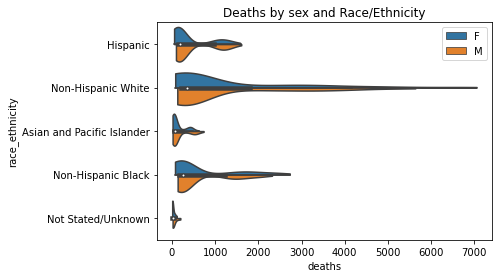

In [107]:
plot = sns.violinplot(data=numdf, x='deaths', y='race_ethnicity', hue='sex', split=True, cut=0).set(
    title = 'Deaths by sex and Race/Ethnicity'
)
plt.legend(bbox_to_anchor = (1,1))

Each datapoint used to build this violin plot is a cause of death. This gives us a good picture of the distribution of the number of deaths to each cause of death. As we can see from the plot, it is most common for a cause of death to have a low number of deaths associated with it, with Non-Hispanic White having an outlier leading cause with nearly 7000 deaths in one year associated with it.

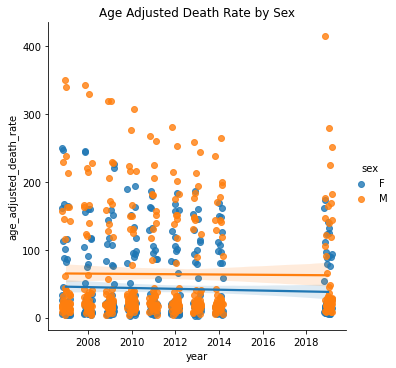

In [136]:
plot = sns.lmplot(data=numdf, x='year', y='age_adjusted_death_rate', hue='sex', x_jitter=0.2).set(
    title = 'Age Adjusted Death Rate by Sex'
)

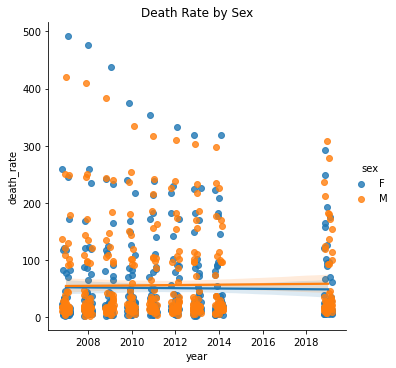

In [137]:
plot = sns.lmplot(data=numdf, x='year', y='death_rate', hue='sex', x_jitter=0.2).set(
    title = 'Death Rate by Sex'
)

Running a linear regression on the death rate and age adjusted death rates by gender helps to highlight the the differences in accuracy that we previously mentioned. While the death rate has almost identical regressions, you can clearly see the higher male death rate that we had noticed earlier in the age adjusted death rates.

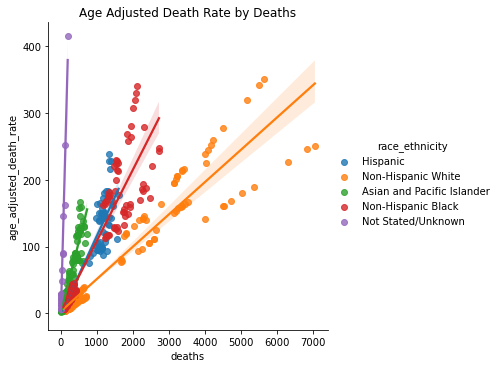

In [142]:
plot = sns.lmplot(data=numdf, x='deaths', y='age_adjusted_death_rate', hue='race_ethnicity').set(
    title = 'Age Adjusted Death Rate by Deaths'
)

This figure helps to highlight which races/ethnicities have higher or lower populations. The steeper the regression for the ethnic or racial group, the lower the population. This is because each death represents a larger portion of the population and therefore a larger increase in the death rate.

# Summary

After analysing the New York City mortality data, I have been able to draw some conclusions. The most significant piece of information that I have noticed is the significant gap in gross death rates between the main racial and ethnic groups in New York City. I would need more information to investigate this further, but currently I suspect this to be the result of either reporting errors or differnces between the differnt groups, a result of the age distributions being different between the groups (which would be fixed by calculating an age adjusted death rate), or an actual difference in death rates, which would only raise further questions. The small but consitent differnces in death rates by gender was also interesting. I was fascinated by the amount of information that I was able to extract from this dataset, particularly that I was able to calculate approximate population and gross death rates for various subsets of the data. 